In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
sns.set(style='white')

# Select the disease you want to find compounds for
DISEASE = 'DOID:1826'
DISEASE_NAME = "epilepsy"
%matplotlib inline


In [2]:
# Load dataframes 
compound_info_df = pd.read_csv('https://raw.githubusercontent.com/baranzini-lab/PSPG_245B/master/spoke_compound_info.tsv', sep='\t', header=0, index_col=False)
query_df = pd.read_csv('https://raw.githubusercontent.com/baranzini-lab/PSPG_245B/master/query_table.tsv', sep='\t', header=0, index_col=False)
path_count_and_dwpc_df = pd.read_csv('https://raw.githubusercontent.com/baranzini-lab/PSPG_245B/master/%s_path_table.tsv'%DISEASE_NAME, sep='\t', header=0, index_col=False)
compound_category_and_trial_count_df = pd.read_csv('https://raw.githubusercontent.com/baranzini-lab/PSPG_245B/master/%s_known_relationships.tsv'%DISEASE_NAME, sep='\t', header=0, index_col=False).fillna('NULL')


In [3]:
compound_info_df.head()

,Compound,Name
0,DB01148,Flavoxate
1,DB01359,Penbutolol
2,DB00246,Ziprasidone
3,DB04878,Voglibose
4,DB06589,Pazopanib


In [4]:
path_count_and_dwpc_df.head()

,Compound,Meta_Path,Path_Count,DWPC
0,DB01148,CbGaD,2.0,0.00888
1,DB01148,CdGuD,0.0,0.00000
2,DB01148,CrCtD,0.0,0.00000
3,DB01148,CtDrD,0.0,0.00000
4,DB01148,CuGdD,0.0,0.00000


In [5]:
compound_category_and_trial_count_df.head()

,Compound,Name,Cat,Trials
0,DB00421,Spironolactone,NOT,0.0
1,DB00158,Folic Acid,NOT,0.0
2,DB00230,Pregabalin,DM,0.0
3,DB00661,Verapamil,NULL,3.0
4,DB01183,Naloxone,NULL,1.0


In [6]:
query_df.head()

,Abbrev.,Metapath,meta_query
0,CbGaD,(c:Compound)-[:BINDS_CbG]-(:Gene)-[:ASSOCIATES...,(n0:Compound)-[:BINDS_CbG]-(n%s)-[:ASSOCIATES_...
1,CdGuD,(c:Compound)-[:DOWNREGULATES_CdG]-(:Gene)-[:UP...,(n0:Compound)-[:DOWNREGULATES_CdG]-(n%s)-[:UPR...
2,CrCtD,(c:Compound)-[:RESEMBLES_CrC]-(:Compound)-[:TR...,(n0:Compound)-[:RESEMBLES_CrC]-(n%s)-[:TREATS_...
3,CtDrD,(c:Compound)-[:TREATS_CtD]-(:Disease)-[:RESEMB...,(n0:Compound)-[:TREATS_CtD]-(n%s)-[:RESEMBLES_...
4,CuGdD,(c:Compound)-[:UPREGULATES_CuG]-(:Gene)-[:DOWN...,(n0:Compound)-[:UPREGULATES_CuG]-(n%s)-[:DOWNR...


In [7]:
# use pandas pivot table to make a dataframe where rows are compounds, 
# columns are the meta paths, and values are path counts
pc_pivot.head()


Meta_Path,Compound,CbGaD,CbGbCtD,CbGeAlD,CbGiGaD,CbGiGiGaD,CbGpBPpGaD,CbGpPWpGaD,CcSEcCtD,CdGdCtD,...,CtDdGdD,CtDdGuD,CtDlAlD,CtDpSpD,CtDrD,CtDuGdD,CtDuGuD,CuGdCtD,CuGdD,CuGuCtD
0,DB00014,0.0,0.0,7.0,0.0,37.0,1199.0,0.0,2116.0,0.0,...,0.0,0.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0
1,DB00035,1.0,2.0,24.0,3.0,405.0,15518.0,0.0,1640.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,DB00050,0.0,0.0,7.0,0.0,37.0,1199.0,0.0,261.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,DB00091,7.0,85.0,141.0,20.0,4588.0,26731.0,0.0,2495.0,14.0,...,0.0,0.0,3.0,13.0,0.0,0.0,0.0,4.0,0.0,2.0
4,DB00093,0.0,0.0,2.0,1.0,43.0,3962.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [8]:
# use pandas pivot table to make a dataframe where rows are compounds, 
# columns are the meta paths, and values are DWPC
dwpc_pivot.head()


Meta_Path,Compound,CbGaD,CbGbCtD,CbGeAlD,CbGiGaD,CbGiGiGaD,CbGpBPpGaD,CbGpPWpGaD,CcSEcCtD,CdGdCtD,...,CtDdGdD,CtDdGuD,CtDlAlD,CtDpSpD,CtDrD,CtDuGdD,CtDuGuD,CuGdCtD,CuGdD,CuGuCtD
0,DB00014,0.000000,0.000000,0.002159,0.000000,0.003871,0.013868,0.0,0.077358,0.000000,...,0.0,0.0,0.001760,0.001315,0.0,0.0,0.0,0.000000,0.0,0.000000
1,DB00035,0.002024,0.001872,0.001821,0.009219,0.006828,0.041853,0.0,0.071853,0.000000,...,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000
2,DB00050,0.000000,0.000000,0.002159,0.000000,0.003871,0.013868,0.0,0.024219,0.000000,...,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000
3,DB00091,0.024100,0.030783,0.010174,0.008322,0.023575,0.061059,0.0,0.091028,0.008032,...,0.0,0.0,0.002874,0.030207,0.0,0.0,0.0,0.014464,0.0,0.002541
4,DB00093,0.000000,0.000000,0.000701,0.005242,0.002228,0.028061,0.0,0.000000,0.000000,...,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000


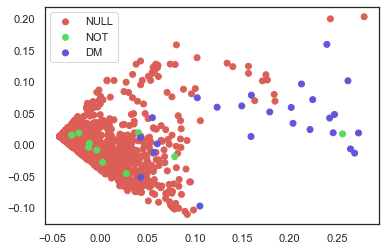

In [9]:
# write a function to plot the PCA using path count, DWPC, or both
# allow coloring by drug status or trial count (see compound_category_and_trial_count_df)
pca = PCA(n_components=2)


In [10]:
# Find the explained variance
print('PC1: %s PC2: %s' % tuple(np.round(pca.explained_variance_ratio_, 2)))


PC1: 0.33 PC2: 0.21


In [11]:
# Find the components for each meta-paths (note: here we are using the abs of the components)
component_df.sort_values(['PC1', 'PC2'], ascending=False).head()

,PC1,PC2
CcSEcCtD,0.587162,0.725049
CiPCiCtD,0.540625,0.298378
CbGbCtD,0.374066,0.216222
CbGpBPpGaD,0.232910,0.048369
CrCrCtD,0.211828,0.379628


Top Compounds


,Compound,Meta_Path,Path_Count,DWPC,Name,Cat,Trials
1434,DB00715,CcSEcCtD,4059.0,0.168369,Paroxetine,NULL,0.0
1090,DB00472,CcSEcCtD,3874.0,0.163602,Fluoxetine,NULL,1.0
137,DB01238,CcSEcCtD,4214.0,0.162924,Aripiprazole,NULL,0.0
111,DB00230,CcSEcCtD,3941.0,0.160834,Pregabalin,DM,0.0
741,DB00285,CcSEcCtD,3791.0,0.158115,Venlafaxine,NULL,0.0


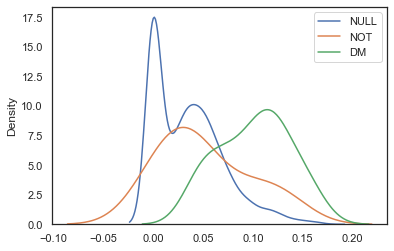

In [12]:
# Look at the distributions of different meta paths.
# Do the disease-modifying comp separate from the rest?



In [13]:
# After you find meta-paths with good separation, look at the top hits in Neo4j
# Write a function to create a Cyper query that will show you the meta paths between the disease and compound
get_cyper_query(query_df, compound = 'DB00230', meta_path='CcSEcCtD')

MATCH path=(c:Compound)-[:CAUSES_CcSE]-(:SideEffect)-[:CAUSES_CcSE]-(:Compound)-[:TREATS_CtD]-(d:Disease) WHERE c.identifier="DB00230" AND d.identifier="DOID:1826" RETURN path LIMIT 5


In [14]:
from IPython.display import Image
from IPython.core.display import HTML 
# This is the output of the above query in Neo4j



In [15]:
# Once you have a good Disease-Compound pair..
# check how it did & look at top 10 paths 
compound = 'DB00230'
print('https://neo4j.het.io/browser/?cmd=play&arg=https://neo4j.het.io/guides/rep/%s/%s.html' % (compound, '_'.join(DISEASE.split(':'))))

https://neo4j.het.io/browser/?cmd=play&arg=https://neo4j.het.io/guides/rep/DB00230/DOID_1826.html


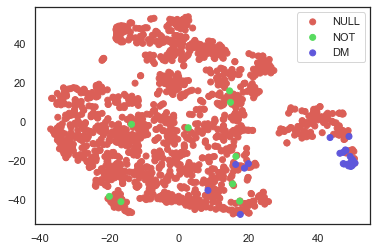

In [16]:
# Plot the results using TSNE
tsne = TSNE(n_components=2)
